# Very basic Auto-Encoder

Based on
https://towardsdatascience.com/a-keras-based-autoencoder-for-anomaly-detection-in-sequences-75337eaed0e5

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generate Sequence Data

In [2]:
first_letters =  'ABCDEF'
second_numbers = '7890'
last_letters = 'RSTUVWXYZ'

# returns a string of the following format: [4 letters A-F][1 digit 7-0][3 letters QWOPZXML]
def get_random_string():
    str1 = ''.join(random.choice(first_letters) for i in range(4))
    str2 = random.choice(second_numbers)
    str3 = ''.join(random.choice(last_letters) for i in range(3))
    return str1+str2+str3

In [3]:
# get 25,000 sequences of this format
random_sequences = [get_random_string() for i in range(25000)]
random_sequences[:5]

['ADBB0WYS', 'FEAB0RTU', 'CDDD9XRX', 'DFDE8TTX', 'EACC0WSY']

In [4]:
#Build the char index that we will use to encode seqs to numbers
char_index = '0abcdefghijklmnopqrstuvwxyz'
char_index +='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_index += '123456789'
char_index += '().,-/+=&$?@#!*:;_[]|%⸏{}\"\'' + ' ' +'\\'

char_to_int = dict((c, i) for i, c in enumerate(char_index))
int_to_char = dict((i, c) for i, c in enumerate(char_index))

In [5]:
#print(list(enumerate(char_index)))

In [6]:
#char_to_int

In [9]:
[char_to_int[c] for c in 'Hola']

[34, 15, 12, 1]

In [10]:
from keras.preprocessing.sequence import pad_sequences
#function that convert a char seqs to numbers seqs and vice-verse
def encode_sequence_list(seqs):
    encoded_seqs = []
    for seq in seqs:
        encoded_seq = [char_to_int[c] for c in seq]
        encoded_seqs.append(encoded_seq)
    return pad_sequences(encoded_seqs, padding='post')

def decode_sequence_list(seqs):
    decoded_seqs = []
    for seq in seqs:
        decoded_seq = [int_to_char[i] for i in seq]
        decoded_seqs.append(decoded_seq)
    return decoded_seqs


Using TensorFlow backend.
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sequi/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [11]:
random_sequences[:10]

['ADBB0WYS',
 'FEAB0RTU',
 'CDDD9XRX',
 'DFDE8TTX',
 'EACC0WSY',
 'BBBA7UXU',
 'ECEC8TVR',
 'DADB9YTV',
 'BDDD0URZ',
 'CFDA7XSU']

In [12]:
# add some anomalies to our list
random_sequences.extend(['XYDC2DCA', 'TXSX1ABC','RNIU4XRE','AABDXUEI','SDRAC5RF'])
#save this to a dataframe
seqs_ds = pd.DataFrame(random_sequences)
# encode each string seq to an integer array [[1],[5],[67]], [[45],[76],[7]
encoded_seqs = encode_sequence_list(random_sequences)

In [13]:
print('Normal data:')
print(random_sequences[:5])
print(encoded_seqs[:5])

Normal data:
['ADBB0WYS', 'FEAB0RTU', 'CDDD9XRX', 'DFDE8TTX', 'EACC0WSY']
[[27 30 28 28  0 49 51 45]
 [32 31 27 28  0 44 46 47]
 [29 30 30 30 61 50 44 50]
 [30 32 30 31 60 46 46 50]
 [31 27 29 29  0 49 45 51]]


In [14]:
print('Fake data:')
print(random_sequences[-5:])
print(encoded_seqs[-5:])

Fake data:
['XYDC2DCA', 'TXSX1ABC', 'RNIU4XRE', 'AABDXUEI', 'SDRAC5RF']
[[50 51 30 29 54 30 29 27]
 [46 50 45 50 53 27 28 29]
 [44 40 35 47 56 50 44 31]
 [27 27 28 30 50 47 31 35]
 [45 30 44 27 29 57 44 32]]


In [15]:
# mix everything up
np.random.shuffle(encoded_seqs)

### Prepare the Data and Build an Autoencoder

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_seqs = scaler.fit_transform(encoded_seqs)
# Divide in train and test:
X_train = scaled_seqs[:20000]
X_test = scaled_seqs[20000:]
# Observe that we are training WITH the fake data in

In [17]:
print(encoded_seqs[:5])
print(scaled_seqs[:5])

[[28 27 29 31  0 50 52 50]
 [30 29 32 27 61 47 48 52]
 [28 30 32 28 61 49 45 52]
 [30 28 32 31 59 44 49 45]
 [28 32 27 31  0 51 45 52]]
[[0.04347826 0.         0.11111111 0.17391304 0.         0.76666667
  1.         0.92      ]
 [0.13043478 0.08333333 0.27777778 0.         1.         0.66666667
  0.83333333 1.        ]
 [0.04347826 0.125      0.27777778 0.04347826 1.         0.73333333
  0.70833333 1.        ]
 [0.13043478 0.04166667 0.27777778 0.17391304 0.96721311 0.56666667
  0.875      0.72      ]
 [0.04347826 0.20833333 0.         0.17391304 0.         0.8
  0.70833333 1.        ]]


In [18]:
# We define the auto-encoder NN
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

# Parameters for the auto-encoder
input_dim = X_train.shape[1] # number of features (8 in this case)
encoding_dim = 8
hidden_dim = int(encoding_dim / 2)

#  Autoencoder plot:
#
#    x       x
#    x       x
#    x   x   x
#    x   x   x
#    x   x   x
#    x   x   x
#    x       x 
#    x       x
#    


# Typical training features
nb_epoch = 30
batch_size = 128
learning_rate = 0.1

# We create the auto-encoder layer by layer:

# Create first layer that receives each scaled_seq
input_layer = Input(shape=(input_dim, ))

# Pass it to a first layer
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
# Reduce in half the layer length (extract relevant variables)
encoder = Dense(hidden_dim, activation="relu")(encoder)
# One more "latent space" layer to sophisticate the NN
decoder = Dense(hidden_dim, activation='relu')(encoder)
#decoder = Dense(hidden_dim-2, activation='relu')(encoder)
#decoder = Dense(hidden_dim, activation='relu')(encoder)
#decoder = Dense(hidden_dim, activation='relu')(encoder)
# Now enlarge layer to go back to entering dimension
decoder = Dense(encoding_dim, activation='relu')(decoder)
# Finish with the same dimension as entering
decoder = Dense(input_dim, activation='tanh')(decoder)

# Physically create the auto-encoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)



W1109 01:06:45.880820 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 01:06:45.914235 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 01:06:45.923120 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [19]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


<b>Drop-out:</b> Observe we are not adding drop-out for simplicity, but it is recommendable to do it. Or at least to explore it! 

<b>Tanh:</b>
Yan LeCun and others argue in *Efficient BackProp* that

Convergence is usually faster if the average of each input variable over the training set is close to zero. To see this, consider the extreme case where all the inputs are positive. Weights to a particular node in the first weight layer are updated by an amount proportional to δx where δ is the (scalar) error at that node and x is the input vector (see equations (5) and (10)). When all of the components of an input vector are positive, all of the updates of weights that feed into a node will have the same sign (i.e. sign(δ)). As a result, these weights can only all decrease or all increase together for a given input pattern. Thus, if a weight vector must change direction it can only do so by zigzagging which is inefficient and thus very slow. 

### Fit the Model

In [20]:
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model_seqs2.h5",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,  # <---- THIS IS THE *KEY* LINE TO MAKE IT AUTO-ENCODER
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

W1109 01:07:01.566585 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1109 01:07:02.732564 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1109 01:07:02.956047 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 20000 samples, validate on 5005 samples


W1109 01:07:03.313205 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1109 01:07:03.314690 140438831126016 deprecation_wrapper.py:119] From /home/sequi/.local/lib/python3.7/site-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/30
20000/20000 [==============================] - 1s 27us/step - loss: 0.2407 - acc: 0.2365 - val_loss: 0.0986 - val_acc: 0.7794
Epoch 2/30
20000/20000 [==============================] - 0s 22us/step - loss: 0.0628 - acc: 0.4330 - val_loss: 0.0472 - val_acc: 0.1804
Epoch 3/30
20000/20000 [==============================] - 0s 17us/step - loss: 0.0406 - acc: 0.1708 - val_loss: 0.0348 - val_acc: 0.1804
Epoch 4/30
20000/20000 [==============================] - 0s 20us/step - loss: 0.0287 - acc: 0.1708 - val_loss: 0.0231 - val_acc: 0.1804
Epoch 5/30
20000/20000 [==============================] - 0s 15us/step - loss: 0.0206 - acc: 0.1708 - val_loss: 0.0188 - val_acc: 0.1804
Epoch 6/30
20000/20000 [==============================] - 0s 15us/step - loss: 0.0175 - acc: 0.1708 - val_loss: 0.0164 - val_acc: 0.1806
Epoch 7/30
20000/20000 [==============================] - 0s 16us/step - loss: 0.0151 - acc: 0.2265 - val_loss: 0.0134 - val_acc: 0.6336
Epoch 8/30
20000/20000 [=================

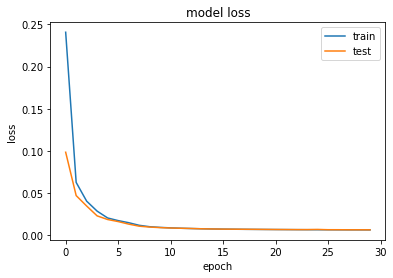

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [22]:
#autoencoder = load_model('model_seqs2.h5')
print(f'Min Loss:{np.min(history["loss"])}')

Min Loss:0.006492977341264486


### Calculate the Error Term

In [23]:
#get the MSE error term
predictions = autoencoder.predict(scaled_seqs)
mse = np.mean(np.power(scaled_seqs - predictions, 2), axis=1)
print('MSE:', np.quantile(mse, 0.9999)) # => the 9999% quatile - only 0.0001% have error score higher than that


MSE: 0.2282694138973218


### Lets return to the seqs_ds data set that holds all the sequences

In [24]:
#encode all the data
encoded_seqs = encode_sequence_list(seqs_ds.iloc[:,0])
#scale it
#sc = MinMaxScaler()
scaled_data = scaler.transform(encoded_seqs)
#test = scaler.transform(encoded_seqs)
#predict it
# We now run again the auto-encoder, but to see its prediciton, no to train it !
predicted = autoencoder.predict(scaled_data)
#get the error term
mse = np.mean(np.power(scaled_data - predicted, 2), axis=1)
#now add them to our data frame
seqs_ds['MSE'] = mse

In [25]:
# Let us create a function that process the sequence through the autoencoder
# and returns the output as a sequence
def test_autoencoder(instring):
    t0 = [instring]
    #print(t0)
    t1 = np.array(encode_sequence_list(t0))
    #print(t1)
    t2 = scaler.transform(t1)
    #print(t2)
    t3 = autoencoder.predict(t2)
    #print(t3)
    t4 = scaler.inverse_transform(t3)
    #print(t4)
    t5 = decode_sequence_list(t4.astype(int))
    #print(t5)
    out = ''.join(t5[0])
    mse = np.mean(np.power(t2 - t3, 2), axis=1)
    return out, round(mse[0],5)

In [26]:
# A 'good' sequence is fairly well reproduced
test_autoencoder('CBAC8QTU')

('BCBB3TTT', 0.00322)

In [27]:
# But a 'bad' sequence is not correctly reproduced because the auto-encoderhas not been trained for it
test_autoencoder('UTAC3QAT')

('BCCBBUUV', 0.26261)

In [28]:
test_autoencoder('RNIU4XRE')

('CCDC8VVV', 0.2159)

In [30]:
# We define a threshold for 'normality' as that of 99.9% (not very politically correct...)
mse_threshold = np.quantile(seqs_ds['MSE'], 0.9999)
print(f'MSE 0.9999 threshhold:{mse_threshold}')

MSE 0.9999 threshhold:0.2282694190206696


In [31]:
# And we create a new column in the dataframe that tags with 1 as those 'anromal' events
seqs_ds['MSE_Outlier'] = 0
seqs_ds.loc[seqs_ds['MSE'] > mse_threshold, 'MSE_Outlier'] = 1

In [32]:
# Let's see how many are tagged as anomalous (that is the 0.1% of 25005)
print(f"Num of MSE outlier:{seqs_ds['MSE_Outlier'].sum()}")

Num of MSE outlier:3


In [33]:
# Let's print the 5 (we know that are) anomalous events and their tag:
seqs_ds.iloc[25000:]

,0,MSE,MSE_Outlier
25000,XYDC2DCA,0.469589,1
25001,TXSX1ABC,0.574537,1
25002,RNIU4XRE,0.215899,0
25003,AABDXUEI,0.150012,0
25004,SDRAC5RF,0.240660,1


In [34]:
# For curiosity, let's see all those that are tagged as anomalous
seqs_ds.loc[seqs_ds['MSE_Outlier'] == 1]

,0,MSE,MSE_Outlier
25000,XYDC2DCA,0.469589,1
25001,TXSX1ABC,0.574537,1
25004,SDRAC5RF,0.240660,1


## We have found the anomalous events with : 

<b>Unsupervised Machine Learning Auto-Encoder technique! </b>

#  Aftermath

- We have added anomalous events relatively different
- It is very important how we create our char_to_int function, since here we state that 'A' and 'B' are "similar", but 'a' and 'A' are "not similar"!
- Hence the translation "whatever info we are examining" -> numbers, to then feed the NN is a crucial part of the job of recognizing 'similar' things